---
### あたらしいPythonによるデータ分析の教科書　より

**p031**～ Pythonの基礎

In [9]:
names = ['spma','ham', 'eggs', 'eggs2', 'eggs3']
lens = []
for name in names:
    lens.append(len(name))

lens

[4, 3, 4, 5, 5]

In [5]:
lens2 = [len(name) for name in names]
lens2

[4, 3, 4]

In [10]:
{len(name) for name in names}

{3, 4, 5}

In [11]:
{name:len(name) for name in names}

{'spma': 4, 'ham': 3, 'eggs': 4, 'eggs2': 5, 'eggs3': 5}

In [15]:
[x*x for x in range(5,10) if x % 2 == 0]

[36, 64]

In [16]:
g = (x*x for x in range (100000))
type(g)

generator

In [20]:
next(g)

9

**p033**～ファイル入出力

In [22]:
with open('sample.txt','w',encoding='utf-8') as f:
    f.write('こんにちは\n')
    f.write('Python\n')
    

In [23]:
f.closed

True

In [29]:
f.close()

---
p33のやり方だと <function TextIOWrapper.read(size=-1, /)> が出力されたため、以下を参考に  
[Python: テキストファイルの読み込み - read()、readlines()、readline()メソッド | Yukun's Blog](https://yukun.info/python-file/)  

ついでにファイルオープン時の文字コード指定  
[Pythonのopen関数のencoding引数は必須でもいいんじゃない - ベスパリブ](https://takeg.hatenadiary.jp/entry/2018/02/02/115754)  


In [32]:
with open('sample.txt', encoding='utf-8') as f:
    data = f.read
    
data

<function TextIOWrapper.read(size=-1, /)>

In [5]:
f = open('sample.txt', encoding="utf-8")
line = f.readline() # 1行を文字列として読み込む(改行文字も含まれる)
while line:
    print(line)
    line = f.readline()
f.close()

こんにちは

Python



---
p34～

In [7]:
s1='hello python'
s1.upper(),s1.lower(),s1.title()


('HELLO PYTHON', 'hello python', 'Hello Python')

In [10]:
s1b = s1.replace('hello','Hi')

In [11]:
s1b

'Hi python'

In [14]:
s2 = ' spam ham eggs '
s2.split()

['spam', 'ham', 'eggs']

s2.strip()

In [22]:
s3 = 'sample.jpg'
s3.endswith(('jpg','png'))

False

In [27]:
s3a = "1234"
s3a.isdigit()

True

In [28]:
len(s3a)

4

In [33]:
print(s1)
'pya' in s1

hello python


False

In [37]:
'*'.join({'spam','ham'})

'spam*ham'

---
p036～ formatメソッド

In [41]:
lang,num,name = 'pthon',10,'takanory'
name = 'sato'
'{1}は{2}が大好きです'.format(lang,num,name)

'10はsatoが大好きです'

In [43]:
'{l}は{n}が{m}大好きです'.format(l=lang,n=num,m=name)

'pthonは10がsato大好きです'

---
**p036～　標準ライブラリ**

In [47]:
import re
prog = re.compile('(P(yth|l)|Z)o[pn]e?')
#正規表現オブジェクトを作成

prog.search('Python')
#マッチする場合は、マッチオブジェクトを返す


<re.Match object; span=(0, 6), match='Python'>

In [48]:
# マッチしない場合はnone（何も返さない）
prog.search('Spam')

In [2]:
import logging
logging.basicConfig(filename='example.log',level=logging.INFO,format='%(asctime)s:%(levelname)s:%(message)s')

In [4]:
logging.debug('おばかさん')

In [6]:
logging.info('いんふぉだってよ')

ログが開きっぱなしになっているような気がするが。  
そもそもimport loggingは使うべきではない、という記事  
[【Python】 loggerのログが重複する - gologiusの巣](http://gologius.hatenadiary.com/entry/2018/06/06/214541)  


In [7]:
from datetime import datetime,date
datetime.now()

datetime.datetime(2019, 4, 20, 19, 22, 38, 109605)

form～import の使い方は以下に。いろいろなパターンで解説してある。  
[Python from・importの基本的な使い方 | 鎖プログラム](https://pg-chain.com/python-from-import)  

In [10]:
date.today()

datetime.date(2019, 4, 20)

In [11]:
date.today() - date(2008,12,3)

datetime.timedelta(days=3790)

In [15]:
dn = datetime.now()

In [16]:
dn.year

2019

年・月・日だけを取ってくる方法。  
datetimeオブジェクトの属性（information）なので、インスタンス化させてから取得すればいいみたい  
[Pythonのdatetimeで日付や時間と文字列を変換（strftime, strptime） | note.nkmk.me](https://note.nkmk.me/python-datetime-usage/)   

In [19]:
datetime.strptime('2018年7月11日','%Y年%m月%d日') # 文字列を日時に変換

datetime.datetime(2018, 7, 11, 0, 0)

---
**p40～ pickleモジュール**

In [24]:
import pickle

d={'today':date.today(),'delta':date(2020,1,1)-date.today()}
d

{'today': datetime.date(2019, 4, 21), 'delta': datetime.timedelta(days=255)}

In [25]:
pickle.dumps(d)

b'\x80\x03}q\x00(X\x05\x00\x00\x00todayq\x01cdatetime\ndate\nq\x02C\x04\x07\xe3\x04\x15q\x03\x85q\x04Rq\x05X\x05\x00\x00\x00deltaq\x06cdatetime\ntimedelta\nq\x07K\xffK\x00K\x00\x87q\x08Rq\tu.'

pickle = ピクルスのことらしい  
[python オブジェクトのピクル(pickle)化 - dackdive's blog](https://dackdive.hateblo.jp/entry/2014/09/16/112404)  

シェルから python -m ×××　で任意の標準モジュールを実行できる
[Pythonでコマンドラインからpickleの中身を確認する - Qiita](https://qiita.com/yagays/items/3dd084469a7444714695)  

In [26]:
# ファイルをバイト書き込みモードで開く
with open('date.pkl','wb') as f:
    # Pickle形式のデータを保存
    pickle.dump(d,f)


ふと、クラス、モジュール、メソッド、関数という言葉がごっちゃだったので調べてみた  
[【Python】モジュール・クラス・メソッドの関係を知る | 鎖プログラム](https://pg-chain.com/python-module-class-method)  
[Python初心者がステップアップするために覚えたいこと | 株式会社キャパ CAPA,Inc.](https://www.capa.co.jp/archives/7169)  

In [28]:
#ファイルをバイト読み込みモードで開く
with open('date.pkl','rb') as f:
    new_d = pickle.load(f)

new_d

{'today': datetime.date(2019, 4, 21), 'delta': datetime.timedelta(days=255)}

with構文は「ある機能の利用者が、より安全、簡潔にその機能を使えるようにする構文」とのこと  
[with構文とは何なのか - 年中アイス](https://reiki4040.hatenablog.com/entry/20130331/1364723288)    


---
**p041～ pathlibモジュール**  
[pathlib --- オブジェクト指向のファイルシステムパス — Python 3.7.3 ドキュメント](https://docs.python.org/ja/3/library/pathlib.html)  

In [29]:
from pathlib import Path
#Pathオブジェクトを現在のディレクトリで作成
p = Path()
p

WindowsPath('.')

In [38]:
#txtファイルを順番に開いて読み込む
for filepath in p.glob('*.txt'):
    with open(filepath,encoding='utf-8') as f:
        data = data + f.read()
        
data

'こんにちは\nPython\nこんばんは\nPython\nこんにちは\nPython\n'

In [45]:
p = Path('./date.pkl')
p.exists()

True

In [46]:
p.is_dir()

False

In [51]:
%%timeit -n 100 -r 10

ret = []
for x in range(10000):
    ret.append(x*x)
    

2.23 ms ± 204 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)


---
**マジックコマンドなど**使えるTIPSをまとめたサイト　※あとで読む  
[https://adtech.cyberagent.io/techblog/archives/2317](https://adtech.cyberagent.io/techblog/archives/2317)   


In [ ]:
ここで寄り道。↑サイトを試してみる

In [5]:
%matplotlib inline

参考  
[matplotlib で散布図 (Scatter plot) を描く – Python でデータサイエンス](https://pythondatascience.plavox.info/matplotlib/%E6%95%A3%E5%B8%83%E5%9B%B3)  

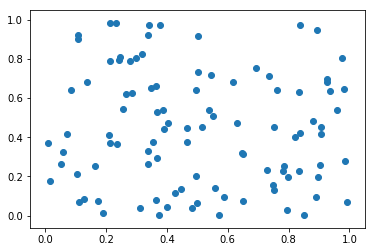

In [11]:
import numpy as np
import matplotlib.pyplot as plt
 
# 乱数を生成
x = np.random.rand(100)
y = np.random.rand(100)
 
# 散布図を描画
plt.scatter(x, y)

In [14]:
!pip list

Package                            Version 
---------------------------------- --------
alabaster                          0.7.12  
anaconda-client                    1.7.2   
anaconda-project                   0.8.2   
asn1crypto                         0.24.0  
astroid                            2.2.5   
astropy                            3.1.2   
atomicwrites                       1.3.0   
attrs                              19.1.0  
Babel                              2.6.0   
backcall                           0.1.0   
backports.os                       0.1.1   
backports.shutil-get-terminal-size 1.0.0   
beautifulsoup4                     4.7.1   
bitarray                           0.8.3   
bkcharts                           0.2     
bleach                             3.1.0   
bokeh                              1.0.4   
boto                               2.49.0  
Bottleneck                         1.2.1   
certifi                            2019.3.9
cffi                            

---
結構、処理時間がかかった。

---
**p90～ Numpy**

In [15]:
import numpy as np

a = np.array([1,2,3])


In [16]:
a

array([1, 2, 3])

In [17]:
print(a)

[1 2 3]


In [18]:
type(a)

numpy.ndarray

In [24]:
i=1.5
type(i)

float

In [25]:
a.shape

(3,)